In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
cwd = os.getcwd()
train_dir = os.path.join(cwd,'rps/')
test_dir = os.path.join(cwd,'rps-test-set/')

train_images = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest', horizontal_flip=True)
test_images = ImageDataGenerator(rescale=1./255)

train_gen = train_images.flow_from_directory(train_dir,target_size=(150,150),class_mode='categorical')
test_gen = test_images.flow_from_directory(test_dir,target_size=(150,150),class_mode='categorical')


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512 ,activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_gen, epochs = 20, validation_data = test_gen, verbose = 1)

Epoch 1/20
79/79 [==============================] - 31s 394ms/step - loss: 1.2295 - accuracy: 0.4206 - val_loss: 0.7032 - val_accuracy: 0.6452
Epoch 2/20
79/79 [==============================] - 35s 439ms/step - loss: 0.7202 - accuracy: 0.6893 - val_loss: 0.3515 - val_accuracy: 0.8952
Epoch 3/20
79/79 [==============================] - 37s 466ms/step - loss: 0.5248 - accuracy: 0.7952 - val_loss: 0.1843 - val_accuracy: 0.9651
Epoch 4/20
79/79 [==============================] - 42s 535ms/step - loss: 0.3883 - accuracy: 0.8687 - val_loss: 0.1182 - val_accuracy: 0.9866
Epoch 5/20
79/79 [==============================] - 46s 588ms/step - loss: 0.2983 - accuracy: 0.9048 - val_loss: 0.0828 - val_accuracy: 0.9892
Epoch 6/20
79/79 [==============================] - 48s 612ms/step - loss: 0.2332 - accuracy: 0.9167 - val_loss: 0.0705 - val_accuracy: 0.9758
Epoch 7/20
79/79 [==============================] - 48s 612ms/step - loss: 0.2266 - accuracy: 0.9175 - val_loss: 0.0547 - val_accuracy: 0.9839

In [23]:
model.save('hps.h5')
model.summary()

<Figure size 432x288 with 0 Axes>

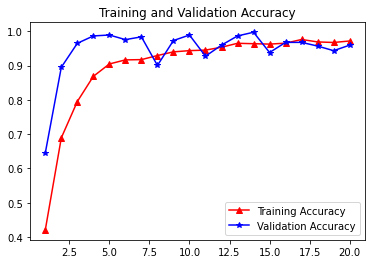

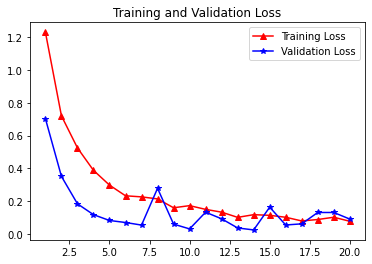

<Figure size 432x288 with 0 Axes>

In [60]:
loss,acc,val_loss,val_acc = history.history.values()
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r-^',label='Training Loss')
plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()


In [61]:
from keras.preprocessing import image

for fn in os.listdir(os.path.join(cwd,'my test\\')):
    fa = os.path.join(cwd,'my test\\',fn)
    images = np.vstack([np.expand_dims(image.img_to_array(image.load_img(fa, target_size=(150,150))),axis=0)])
    predict = model.predict(images, batch_size = 10)[0]
    print(fn,predict,end = ' ')
    if predict[0]>0.5: print('Paper')
    elif predict[1]>0.5: print('Stone')
    elif predict[2]>0.5: print('Scissors')


  (1).JPG [0. 1. 0.] Stone
  (10).JPG [0. 0. 1.] Scissors
  (11).JPG [0. 1. 0.] Stone
  (12).JPG [0. 1. 0.] Stone
  (13).JPG [0. 1. 0.] Stone
  (14).JPG [0. 0. 1.] Scissors
  (15).JPG [0. 1. 0.] Stone
  (2).JPG [0. 0. 1.] Scissors
  (3).JPG [1. 0. 0.] Paper
  (4).JPG [0. 1. 0.] Stone
  (5).JPG [0. 1. 0.] Stone
  (6).JPG [0. 0. 1.] Scissors
  (7).JPG [0. 0. 1.] Scissors
  (8).JPG [0. 0. 1.] Scissors
  (9).JPG [0. 0. 1.] Scissors
testpaper03-01.png [1. 0. 0.] Paper
testpaper03-02.png [1. 0. 0.] Paper
testpaper03-03.png [1. 0. 0.] Paper
testpaper03-04.png [1. 0. 0.] Paper
testpaper03-08.png [1. 0. 0.] Paper
testpaper03-09.png [1. 0. 0.] Paper
testpaper03-10.png [1. 0. 0.] Paper
testpaper03-11.png [1.0000000e+00 0.0000000e+00 4.7344784e-28] Paper


In [64]:
# Load Model from h5 file
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model("hps.h5", compile=True)

In [65]:
for fn in os.listdir(os.path.join(cwd,'my test\\')):
    fa = os.path.join(cwd,'my test\\',fn)
    images = np.vstack([np.expand_dims(image.img_to_array(image.load_img(fa, target_size=(150,150))),axis=0)])
    predict = model.predict(images, batch_size = 10)[0]
    print(fn,predict,end = ' ')
    if predict[0]>0.5: print('Paper')
    elif predict[1]>0.5: print('Stone')
    elif predict[2]>0.5: print('Scissors')


  (1).JPG [0. 1. 0.] Stone
  (10).JPG [0. 0. 1.] Scissors
  (11).JPG [0. 1. 0.] Stone
  (12).JPG [0. 1. 0.] Stone
  (13).JPG [0. 1. 0.] Stone
  (14).JPG [0. 0. 1.] Scissors
  (15).JPG [0. 1. 0.] Stone
  (2).JPG [0. 0. 1.] Scissors
  (3).JPG [1. 0. 0.] Paper
  (4).JPG [0. 1. 0.] Stone
  (5).JPG [0. 1. 0.] Stone
  (6).JPG [0. 0. 1.] Scissors
  (7).JPG [0. 0. 1.] Scissors
  (8).JPG [0. 0. 1.] Scissors
  (9).JPG [0. 0. 1.] Scissors
testpaper03-01.png [1. 0. 0.] Paper
testpaper03-02.png [1. 0. 0.] Paper
testpaper03-03.png [1. 0. 0.] Paper
testpaper03-04.png [1. 0. 0.] Paper
testpaper03-08.png [1. 0. 0.] Paper
testpaper03-09.png [1. 0. 0.] Paper
testpaper03-10.png [1. 0. 0.] Paper
testpaper03-11.png [1.0000000e+00 0.0000000e+00 4.7344784e-28] Paper
